In [48]:
from model import ResNet, ResBlock
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import utils
%matplotlib inline

In [3]:
eager_mode = True
if eager_mode:
    tf.enable_eager_execution()
device, data_format = utils.device_and_data_format()
x_train, y_train, x_val, y_val, x_test, y_test, x_test_raw = utils.get_CIFAR10_data(data_format)

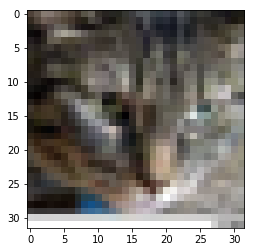

Truth: cat


In [4]:
utils.show_random_image(x_test_raw, y_test)

In [90]:
model = ResNet(data_format)

In [91]:
data = x_train[:32,:]
tf_data = tf.convert_to_tensor(data)
logits = model(tf_data, training=True)

In [52]:
def loss_func(net, x, y):
    logits = net(x)
    return tf.losses.sparse_softmax_cross_entropy(y, logits)

In [55]:
x = tf.convert_to_tensor(x_train[:32,:])
y = tf.convert_to_tensor(y_train[:32], dtype='int32')
loss_func(model, x, y)

<tf.Tensor: id=6597, shape=(), dtype=float32, numpy=26.694336>

In [62]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
optimizer.minimize(lambda: loss_func(model, x, y))

In [71]:
tf.reduce_sum((new_init_weights[0]-old_init_weights[0])**2)

<tf.Tensor: id=7553, shape=(), dtype=float32, numpy=85.12659>

In [76]:
tf.reduce_sum((new_res_weights[18]-old_res_weights[18])**2)

<tf.Tensor: id=7573, shape=(), dtype=float32, numpy=22.987762>

In [92]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_init (Conv2D)           ?                         448       
_________________________________________________________________
res_block_49 (ResBlock)      ?                         3872      
_________________________________________________________________
res_block_50 (ResBlock)      ?                         3648      
_________________________________________________________________
res_block_51 (ResBlock)      ?                         3648      
_________________________________________________________________
res_block_52 (ResBlock)      ?                         14912     
_________________________________________________________________
res_block_53 (ResBlock)      ?                         13952     
_________________________________________________________________
res_block_54 (ResBlock)      ?                         13952     
__________